# Table of Contents
1. [Data Processing](#Data-Processing)
    - [Crash](#Crash)
    - [Population](#Population)
    - [Join crash and population](#Join-crash-and-population)
2. [Data Wrangling](#Data-Wrangling)
    - [Duplicates and Missing Values](#Duplicates-and-Missing-Values)
    - [Transform the data to fit the data model](#Transform-the-data-to-fit-the-data-model)
        - [Location](#Location)
        - [Injury](#Injury)
        - [Vehicle](#Vehicle)
        - [Description](#Description)
        - [Crash_info](#Crash_info)
        
3. [Data Analysis](#Data-Analysis)
    - [Temporal Characteristics of Traffic Crashes (NATE)](#Temporal-Characteristics-of-Traffic-Crashes-(NATE))
    - [Analysing Road Categories And Casualties of Traffic Crashes In New Zealand (RITA)](#Analysing-Road-Categories-And-Casualties-of-Traffic-Crashes-In-New-Zealand-(RITA))
    - [Analysing New Zealand Traffic Accident Injuries and Deaths Map (PANLI)](#Analysing-New-Zealand-Traffic-Accident-Injuries-and-Deaths-Map-(PANLI))
    - [Correlation between the number of car crashes and region population (NINA)](#Correlation-between-the-number-of-car-crashes-and-region-population-(NINA))

In [1]:
#load library
library(dplyr)
library(tidyverse) 
library(skimr) 
library(visdat)
library(knitr)
library(ggplot2)
library(lubridate)
library(sf)
library(data.table)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.4
✔ ggplot2   3.4.2     ✔ stringr   1.5.0
✔ lubridate 1.9.2     ✔ tibble    3.2.1
✔ purrr     1.0.1     ✔ tidyr     1.3.0
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


ERROR: Error in library(visdat): there is no package called 'visdat'


In [3]:
#help function

#save files
savefile <- function(data, filename){
    file_path <- paste0("/Users/nathaniel-work/Library/CloudStorage/OneDrive-UniversityofCanterbury/4_DATA422_Data Wrangling/Assignment/group project/Dataset/outputs/", filename, ".csv")
    # Create the CSV file
    write.csv(data, file = file_path, row.names = FALSE)
    }

#check duplicates
che_duplicate <- function(data, col_name){
  col_name <- enquo(col_name)  # Capture the column name
  
  duplicate_cols <- duplicated(data %>% select(!!col_name)) | duplicated(data %>% select(!!col_name), fromLast = TRUE)
  num_duplicate_cols <- sum(duplicate_cols)
  print(paste("The total number of duplicates:", num_duplicate_cols, "."))
  
  result <- data %>% group_by(!!col_name) %>% count() %>% arrange(desc(n))
  
  return(result)
}

## Data Processing

### Crash

In [144]:
#load datasets
crash_nz <- read.csv("Crash_Analysis_System_(CAS).csv",header = TRUE)
dim(crash_nz)

[1] 821744     72

In [145]:
crash_nz%>%glimpse()

Rows: 821,744
Columns: 72
$ X                         <dbl> 2037858, 1799424, 1756461, 1551129, 1245391,…
$ Y                         <dbl> 5707835, 5815528, 5936053, 5171320, 4849172,…
$ OBJECTID                  <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 1…
$ advisorySpeed             <int> NA, NA, NA, NA, NA, 30, NA, NA, NA, NA, NA, …
$ areaUnitID                <int> 544801, 528900, 507000, 597513, 611500, 6073…
$ bicycle                   <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ bridge                    <int> NA, NA, NA, 0, NA, 0, 0, NA, NA, 0, NA, NA, …
$ bus                       <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ carStationWagon           <int> 2, 2, 0, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2,…
$ cliffBank                 <int> NA, NA, NA, 0, NA, 0, 0, NA, NA, 0, NA, NA, …
$ crashDirectionDescription <chr> "Null", "Null", "Null", "Null", "Null", "Nul…
$ crashFinancialYear        <chr> "2011/2012", "2011/2012", "2012/2013", "2011…
$ crashLocatio

[1] "The total number of missing values: 15287398"


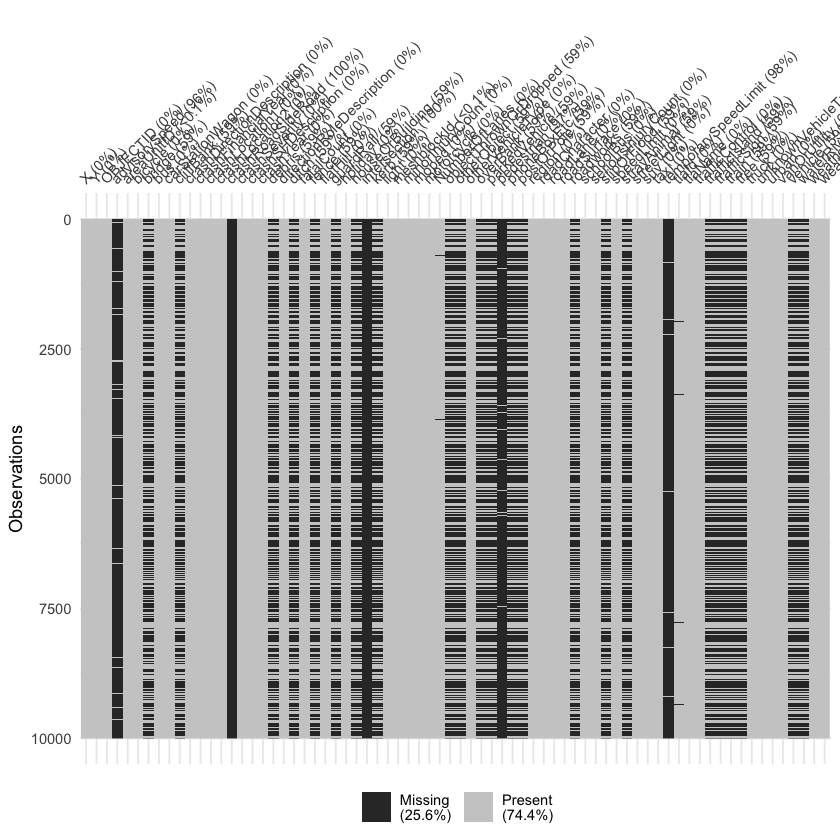

In [146]:
#check missing values
set.seed(123)  
sample_size <- 10000  
sampled_data <- crash_nz %>% sample_n(sample_size)
sampled_data %>% vis_miss(warn_large_data = FALSE)
print(paste("The total number of missing values:", sum(is.na(crash_nz))))

In [147]:
# Calculate percentages of NA values in each column
missing_count <- round(colSums(is.na(crash_nz)) / dim(crash_nz)[1] * 100, 1)

# Create a result dataset
result_df <- data.frame(Column_Names = names(missing_count), Missing_Percentage = missing_count)

# Group the result dataset by Missing_Percentage and count the occurrences
missing_count_summary <- result_df %>% group_by(Missing_Percentage) %>% count()

# Print the summary of missing values for each percentage
print(missing_count_summary)

# Show the result_df
result_df %>% arrange(desc(Missing_Percentage))%>%filter(Missing_Percentage>60)

# A tibble: 9 × 2
# Groups:   Missing_Percentage [9]
  Missing_Percentage     n
               <dbl> <int>
1                0      41
2                0.1     1
3                0.2     1
4                0.4     1
5               59.5    23
6               96.2     1
7               96.8     1
8               98.5     1
9              100       2


,Column_Names,Missing_Percentage
,<chr>,<dbl>
crashRoadSideRoad,crashRoadSideRoad,100.0
intersection,intersection,100.0
temporarySpeedLimit,temporarySpeedLimit,98.5
pedestrian,pedestrian,96.8
advisorySpeed,advisorySpeed,96.2


In [148]:
# remove columns with high percentage of missing values
dim(crash_nz)
crash_nz <- crash_nz %>%
    select(-crashRoadSideRoad,-intersection,-temporarySpeedLimit,-pedestrian,-advisorySpeed)
dim(crash_nz)

[1] 821744     72

[1] 821744     67

In [149]:
#remove rows without region
dim(crash_nz)
crash_nz <- crash_nz %>%
  filter(!is.na(region) & region != "" & !is.na(crashYear) & crashYear != "")
dim(crash_nz)

[1] 821744     67

[1] 818556     67

[1] "The total number of missing values: 11190950"


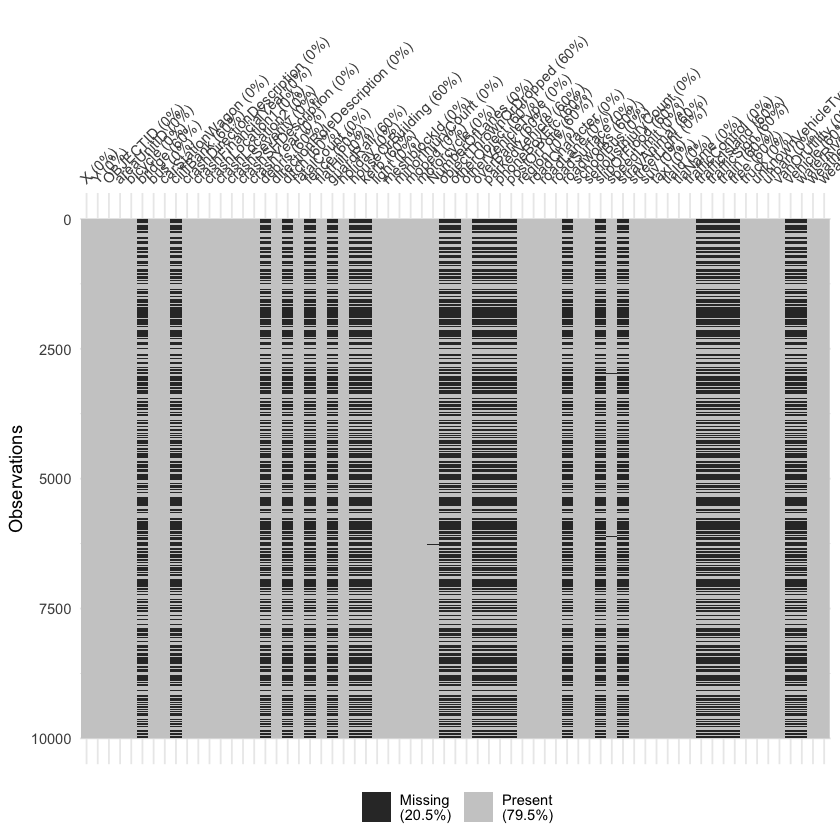

In [150]:
#check missing values
set.seed(123)  
sample_size <- 10000  
sampled_data <- crash_nz %>% sample_n(sample_size)
sampled_data %>% vis_miss(warn_large_data = FALSE)
print(paste("The total number of missing values:", sum(is.na(crash_nz))))

In [151]:
crash_nz%>%group_by(crashYear,region)%>%count()%>%head(2)

crashYear,region,n
<int>,<chr>,<int>
2000,Auckland Region,12285
2000,Bay of Plenty Region,1336


In [152]:
#create pop id in crash
crash_nz <- crash_nz %>%
  mutate(pop_id = paste0(crashYear, "_", region))

In [153]:
crash_nz%>%group_by(pop_id)%>%count()%>%head(10)

pop_id,n
<chr>,<int>
2000_Auckland Region,12285
2000_Bay of Plenty Region,1336
2000_Canterbury Region,3563
2000_Gisborne Region,319
2000_Hawke's Bay Region,1236
2000_Manawatū-Whanganui Region,1984
2000_Marlborough Region,272
2000_Nelson Region,288
2000_Northland Region,1015


### Population

In [154]:
#load the population dataset
pop<- read.csv("nz_population.csv")
pop%>%glimpse()

Rows: 64
Columns: 18
$ date                                   <chr> "1960", "1961", "1962", "1963",…
$ New.Zealand.Count_Person               <int> 2371800, 2419700, 2482000, 2531…
$ Manawatū.Whanganui.Region.Count_Person <int> NA, NA, NA, NA, NA, NA, NA, NA,…
$ Waikato.Region.Count_Person            <int> NA, NA, NA, NA, NA, NA, NA, NA,…
$ Marlborough.District.Count_Person      <int> NA, NA, NA, NA, NA, NA, NA, NA,…
$ Taranaki.Region.Count_Person           <int> NA, NA, NA, NA, NA, NA, NA, NA,…
$ Nelson.Count_Person                    <int> NA, NA, NA, NA, NA, NA, NA, NA,…
$ Gisborne.Count_Person                  <int> NA, NA, NA, NA, NA, NA, NA, NA,…
$ Wellington.Count_Person                <int> NA, NA, NA, NA, NA, NA, NA, NA,…
$ Hawke.s.Bay.Region.Count_Person        <int> NA, NA, NA, NA, NA, NA, NA, NA,…
$ Auckland.Count_Person                  <int> NA, NA, NA, NA, NA, NA, NA, NA,…
$ Bay.of.Plenty.Count_Person             <int> NA, NA, NA, NA, NA, NA, NA, NA,…
$ West.Coast.Region

#### COMMENT

As shown above, the format of population dataset needs to be transformed into long format to meet our requirements.

In [155]:
#wide to long
pop_long <- pop %>%
  pivot_longer(cols = -date, names_to = "region", values_to = "value")

In [156]:
pop_long %>% glimpse()
pop_long %>% head(10)

Rows: 1,088
Columns: 3
$ date   <chr> "1960", "1960", "1960", "1960", "1960", "1960", "1960", "1960",…
$ region <chr> "New.Zealand.Count_Person", "Manawatū.Whanganui.Region.Count_Pe…
$ value  <int> 2371800, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA…


date,region,value
<chr>,<chr>,<int>
1960,New.Zealand.Count_Person,2371800
1960,Manawatū.Whanganui.Region.Count_Person,NA
1960,Waikato.Region.Count_Person,NA
1960,Marlborough.District.Count_Person,NA
1960,Taranaki.Region.Count_Person,NA
1960,Nelson.Count_Person,NA
1960,Gisborne.Count_Person,NA
1960,Wellington.Count_Person,NA
1960,Hawke.s.Bay.Region.Count_Person,NA


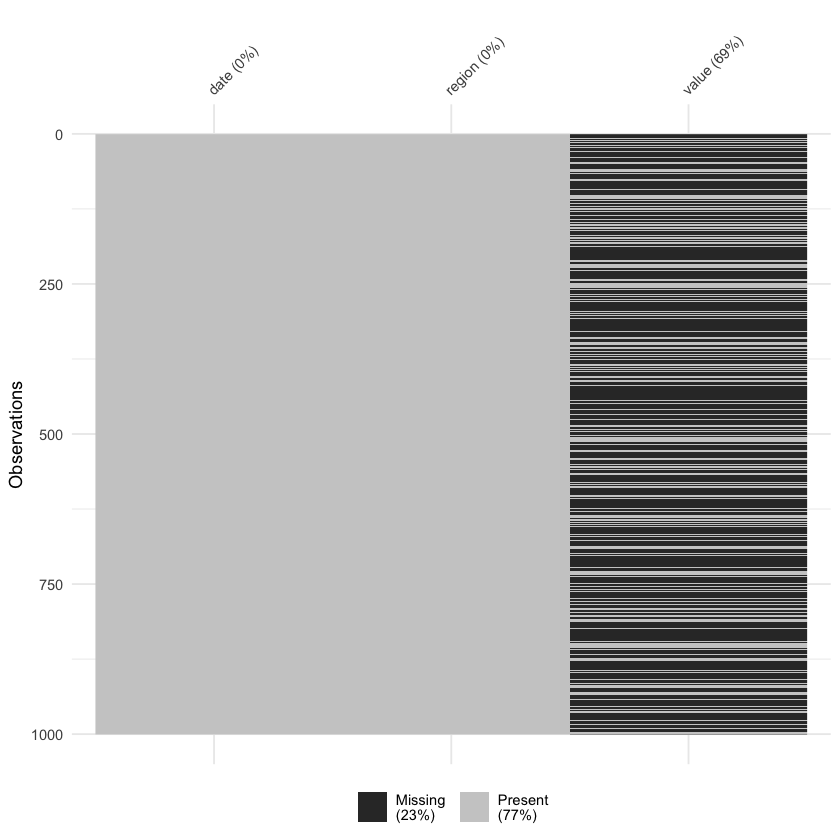

In [157]:
set.seed(123)  
sample_size <- 1000  
sampled_data <- pop_long %>% sample_n(sample_size)
sampled_data %>% vis_miss(warn_large_data = FALSE)

In [158]:
#select the same time range with crash_nz

pop_nz <- pop_long %>% 
    filter(date>="2001"& date<="2022")%>%
    group_by(date,region)%>%
    summarise(value = sum(value))

`summarise()` has grouped output by 'date'. You can override using the
`.groups` argument.


In [159]:
pop_nz%>%glimpse()

Rows: 391
Columns: 3
Groups: date [23]
$ date   <chr> "2001", "2001", "2001", "2001", "2001", "2001", "2001", "2001",…
$ region <chr> "Auckland.Count_Person", "Bay.of.Plenty.Count_Person", "Canterb…
$ value  <int> 1074507, 246900, 496700, NA, 147300, 227500, NA, NA, 3880500, 1…


In [160]:
che_duplicate(pop_nz,region)

Adding missing grouping variables: `date`
Adding missing grouping variables: `date`


[1] "The total number of duplicates: 0 ."


region,n
<chr>,<int>
Auckland.Count_Person,23
Bay.of.Plenty.Count_Person,23
Canterbury.Region.Count_Person,23
Gisborne.Count_Person,23
Hawke.s.Bay.Region.Count_Person,23
Manawatū.Whanganui.Region.Count_Person,23
Marlborough.District.Count_Person,23
Nelson.Count_Person,23
New.Zealand.Count_Person,23


In [161]:
#modify the region name to match crash_nz
pop_nz <- pop_nz %>%
  mutate(region = case_when(
    region == "Auckland.Count_Person" ~ "Auckland Region",
    region == "Bay.of.Plenty.Count_Person" ~ "Bay of Plenty Region",
    region == "Canterbury.Region.Count_Person" ~ "Canterbury Region",
    region == "Gisborne.Count_Person" ~ "Gisborne Region",
    region == "Hawke.s.Bay.Region.Count_Person" ~ "Hawke's Bay Region",
    region == "Manawatū.Whanganui.Region.Count_Person" ~ "Manawatū-Whanganui Region",
    region == "Marlborough.District.Count_Person" ~ "Marlborough Region",
    region == "Nelson.Count_Person" ~ "Nelson Region",
    region == "New.Zealand.Count_Person" ~ "New Zealand",
    region == "Northland.Region.Count_Person" ~ "Northland Region",
    region == "Otago.Region.Count_Person" ~ "Otago Region",
    region == "Southland.Region.Count_Person" ~ "Southland Region",
    region == "Taranaki.Region.Count_Person" ~ "Taranaki Region",
    region == "Tasman.District.Count_Person" ~ "Tasman Region",
    region == "Waikato.Region.Count_Person" ~ "Waikato Region",
    region == "Wellington.Count_Person" ~ "Wellington Region",
    region == "West.Coast.Region.Count_Person" ~ "West Coast Region",
    TRUE ~ region  # Handle other cases
  ))

In [162]:
pop_nz%>%head(5)

date,region,value
<chr>,<chr>,<int>
2001,Auckland Region,1074507
2001,Bay of Plenty Region,246900
2001,Canterbury Region,496700
2001,Gisborne Region,NA
2001,Hawke's Bay Region,147300


In [163]:
#generate the population id to be the primary key of population table
pop_nz <- pop_nz %>%
  mutate(pop_id = paste0(date, "_", region))

In [164]:
pop_nz%>%head(3)

date,region,value,pop_id
<chr>,<chr>,<int>,<chr>
2001,Auckland Region,1074507,2001_Auckland Region
2001,Bay of Plenty Region,246900,2001_Bay of Plenty Region
2001,Canterbury Region,496700,2001_Canterbury Region


In [165]:
#check duplicates
che_duplicate(pop_nz,pop_id)%>%head(3)

Adding missing grouping variables: `date`
Adding missing grouping variables: `date`


[1] "The total number of duplicates: 0 ."


pop_id,n
<chr>,<int>
2001_Auckland Region,1
2001_Bay of Plenty Region,1
2001_Canterbury Region,1


In [166]:
pop_nz <- pop_nz %>%
  ungroup() %>%
  select(-date)

In [167]:
pop_nz%>%head(5)

region,value,pop_id
<chr>,<int>,<chr>
Auckland Region,1074507,2001_Auckland Region
Bay of Plenty Region,246900,2001_Bay of Plenty Region
Canterbury Region,496700,2001_Canterbury Region
Gisborne Region,NA,2001_Gisborne Region
Hawke's Bay Region,147300,2001_Hawke's Bay Region


In [168]:
savefile(pop_nz,"pop_nz")

### Join crash and population

In [169]:
#join population with crash
crash_nz <- crash_nz %>%
  left_join(pop_nz %>% select(pop_id, value) %>% rename(population = value), by = "pop_id", suffix = c("", ".pop_nz")) %>%
  #group_by(date) %>%
  mutate(population = ifelse(is.na(population), NA, population)) %>%
  select(-ends_with(".pop_nz"))

In [170]:
crash_nz%>%glimpse()

Rows: 818,556
Columns: 69
$ X                         <dbl> 2037858, 1799424, 1756461, 1551129, 1245391,…
$ Y                         <dbl> 5707835, 5815528, 5936053, 5171320, 4849172,…
$ OBJECTID                  <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 1…
$ areaUnitID                <int> 544801, 528900, 507000, 597513, 611500, 6073…
$ bicycle                   <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ bridge                    <int> NA, NA, NA, 0, NA, 0, 0, NA, NA, 0, NA, NA, …
$ bus                       <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ carStationWagon           <int> 2, 2, 0, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2,…
$ cliffBank                 <int> NA, NA, NA, 0, NA, 0, 0, NA, NA, 0, NA, NA, …
$ crashDirectionDescription <chr> "Null", "Null", "Null", "Null", "Null", "Nul…
$ crashFinancialYear        <chr> "2011/2012", "2011/2012", "2012/2013", "2011…
$ crashLocation1            <chr> "SH 35 WAINUI", "HALL ST", "SHARON ROAD", "S…
$ crashLocatio

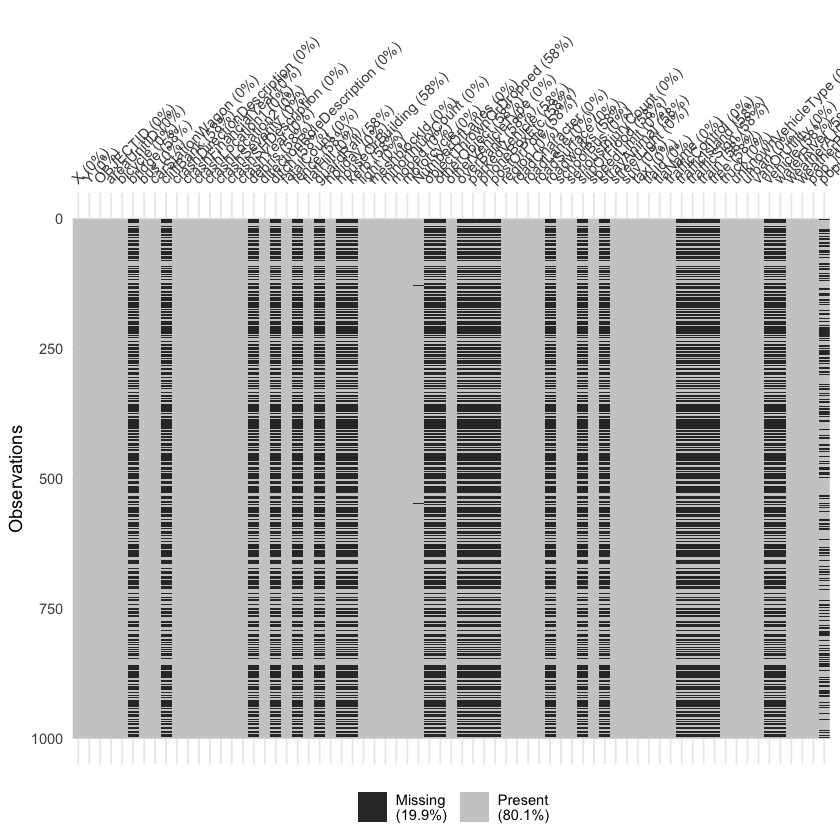

In [171]:
set.seed(123)  
sample_size <- 1000  
sampled_data <- crash_nz %>% sample_n(sample_size)
sampled_data %>% vis_miss(warn_large_data = FALSE)

## Data Wrangling

### Duplicates and Missing Values

In [172]:
#check duplicates
duplicate_rows <- crash_nz[duplicated(crash_nz), ]
if (nrow(duplicate_rows) > 0) {
  print("Duplicate rows found:")
  print(duplicate_rows)
} else {
  print("No duplicate rows found.")
}

[1] "No duplicate rows found."


In [173]:
#replace "null" "blank" with "NA"
crash_nz <- crash_nz %>%
  mutate_all(~ifelse(. %in% c("null", "NULL", "blank", ""), NA, .))

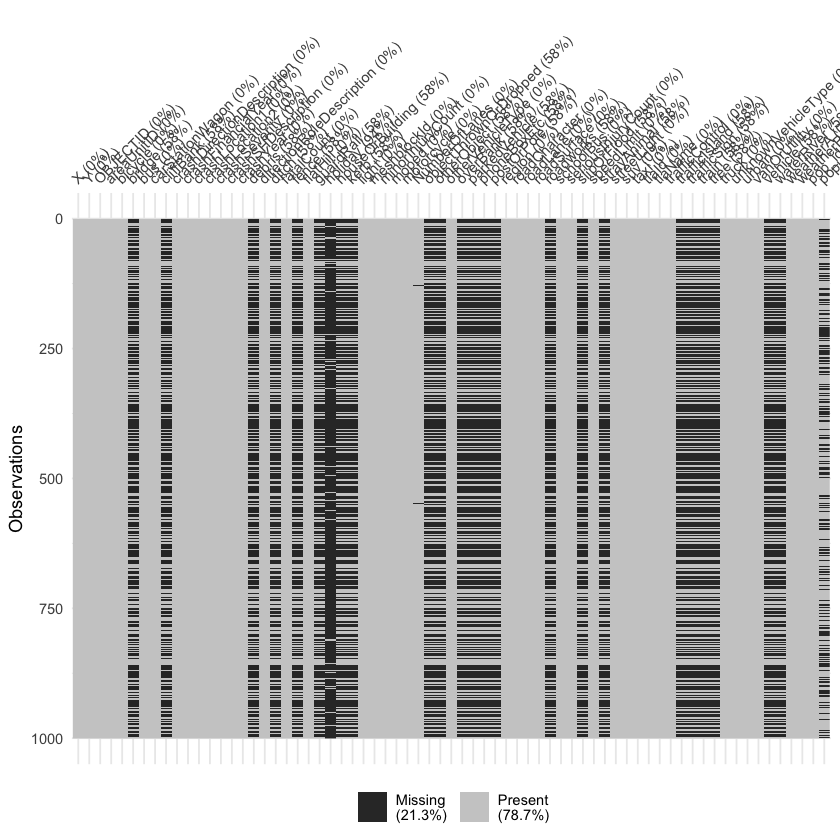

In [174]:
set.seed(123)  
sample_size <- 1000  
sampled_data <- crash_nz %>% sample_n(sample_size)
sampled_data %>% vis_miss(warn_large_data = FALSE)

### Transform the data to fit the data model

select related variables to build the data model based on the goals of model

In [175]:
#convert x and y to latitude and longitude
crash_sf <- st_as_sf(crash_nz, coords = c("X", "Y"), crs = 2193)

crash_sf <- st_transform(crash_sf, crs = 4326)

#create new columns to store lat and long
crash_nz$Latitude <- st_coordinates(crash_sf)[, 2]
crash_nz$Longitude <- st_coordinates(crash_sf)[, 1]

In [176]:
# remove irrelated cols
dim(crash_nz)
crash_nz <- crash_nz %>% select (-X, -Y,-OBJECTID, -areaUnitID)
dim(crash_nz)

[1] 818556     71

[1] 818556     67

In [177]:
#generage crashid

set.seed(123)

# Convert the data frame to a data.table
crash_nz <- as.data.table(crash_nz)

# Generate unique crashids
unique_crashids <- as.character(paste0(crash_nz$crashYear, sample(100000:999999, nrow(crash_nz), replace = TRUE)))

# Define a function to check for duplicates and replace them
replace_duplicates <- function(ids) {
  while (anyDuplicated(ids) > 0) {
    duplicated_indices <- which(duplicated(ids))
    new_ids <- as.character(paste0(crash_nz$crashYear[duplicated_indices], sample(100000:999999, length(duplicated_indices), replace = TRUE)))
    ids[duplicated_indices] <- new_ids
  }
  return(ids)
}

# Replace any duplicate crashids
crash_nz[, crashid := replace_duplicates(unique_crashids)]

# Convert the data.table back to a data frame (if needed)
crash_nz <- as.data.frame(crash_nz)

In [178]:
che_duplicate(crash_nz,crashid)%>%head(2)

[1] "The total number of duplicates: 0 ."


crashid,n
<chr>,<int>
2000100001,1
2000100014,1


#### Location

In [179]:
#generate the location id to be the primary key 
crash_nz <- crash_nz %>%
  mutate(location_id = paste0(Latitude, "_", Longitude))

In [180]:
#create location dataset
location <- crash_nz %>%
  select(
   location_id,region, urban, crashLocation1, crashLocation2, Latitude, Longitude
  )

In [181]:
#check duplicates
che_duplicate(location,location_id)%>%head(2)

[1] "The total number of duplicates: 365506 ."


location_id,n
<chr>,<int>
-36.8579087182035_174.761449481399,188
-36.9926381436281_174.885354139199,177


In [182]:
#remove duplicates and set location_id as PK
dim(location)
location <- location %>% distinct(location_id, .keep_all = TRUE)
dim(location)

[1] 818556      7

[1] 534296      7

In [183]:
#check duplicates
che_duplicate(location,location_id)%>%head(2)

[1] "The total number of duplicates: 0 ."


location_id,n
<chr>,<int>
-34.4302141333536_172.681257636269,1
-34.4311955221322_172.865213492766,1


In [184]:
location%>%glimpse()

Rows: 534,296
Columns: 7
$ location_id    <chr> "-38.6697929142381_178.031839713406", "-37.785862319500…
$ region         <chr> "Gisborne Region", "Waikato Region", "Auckland Region",…
$ urban          <chr> "Urban", "Urban", "Urban", "Open", "Urban", "Open", "Op…
$ crashLocation1 <chr> "SH 35 WAINUI", "HALL ST", "SHARON ROAD", "SPRINGSTON R…
$ crashLocation2 <chr> "HIRINI ST", "LAKE ROAD", "RIDGE ROAD", "DYNES ROAD", "…
$ Latitude       <dbl> -38.66979, -37.78586, -36.70833, -43.60950, -46.41783, …
$ Longitude      <dbl> 178.0318, 175.2647, 174.7517, 172.3944, 168.3853, 169.7…


In [185]:
location <- location %>% rename(address = crashLocation1, street = crashLocation2)

In [186]:
location%>%head(2)

,location_id,region,urban,address,street,Latitude,Longitude
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,-38.6697929142381_178.031839713406,Gisborne Region,Urban,SH 35 WAINUI,HIRINI ST,-38.66979,178.0318
2,-37.7858623195004_175.264694847103,Waikato Region,Urban,HALL ST,LAKE ROAD,-37.78586,175.2647


In [187]:
# write the dataset to the disk
savefile(location,"location")

#### Injury

In [188]:
injury <- crash_nz %>%
  select(crashid,fatalCount, seriousInjuryCount,minorInjuryCount,crashSeverity)

In [189]:
injury%>%glimpse()

Rows: 818,556
Columns: 5
$ crashid            <chr> "2011288941", "2012234057", "2012224021", "20117852…
$ fatalCount         <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ seriousInjuryCount <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ minorInjuryCount   <int> 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, …
$ crashSeverity      <chr> "Non-Injury Crash", "Non-Injury Crash", "Minor Cras…


In [190]:
#check duplicates
che_duplicate(injury,crashid)%>%head(2)

[1] "The total number of duplicates: 0 ."


crashid,n
<chr>,<int>
2000100001,1
2000100014,1


In [191]:
# write the dataset to the disk
savefile(injury,"injury")

In [192]:
#savefile(crash_nz,"crash_nz")

#### Vehicle

In [193]:
#create a new variable to record how many vehicles were involved in every crash record
crash_nz <- crash_nz %>%
  mutate(involved_vehicle = rowSums(select(., 
    bicycle,
    bus,
    carStationWagon,
    moped,
    motorcycle,
    suv,
    taxi,
    train,
    truck,
    unknownVehicleType,
    vanOrUtility), na.rm = TRUE))

In [194]:
dim(crash_nz)

[1] 818556     70

In [195]:
# Create a vector with indices to replicate rows
indices <- rep(1:nrow(crash_nz), crash_nz$involved_vehicle)

# Duplicate rows based on involved_vehicle
crash_nz_v <- crash_nz[indices, ]

# Remove indices column
crash_nz_v$row_id <- NULL

In [196]:
dim(crash_nz)
dim(crash_nz_v)

[1] 818556     70

[1] 1451601      70

In [197]:
#generate vehicleid
crash_nz_v <- crash_nz_v %>%
  mutate(vehicleid = paste0("v_", row_number()))

In [198]:
che_duplicate(crash_nz_v,vehicleid)%>%head(2)

[1] "The total number of duplicates: 0 ."


vehicleid,n
<chr>,<int>
v_1,1
v_10,1


In [199]:
vehicle <- crash_nz_v%>%
    select(vehicleid,
           crashid,
           bicycle,
           bus,
           carStationWagon,
           moped,
           motorcycle,
           suv,
           taxi,
           train,
           truck,
           unknownVehicleType,
           vanOrUtility)

In [116]:
vehicle%>%glimpse()

Rows: 1,451,601
Columns: 13
$ vehicleid          <chr> "v_1", "v_2", "v_3", "v_4", "v_5", "v_6", "v_7", "v…
$ crashid            <chr> "2011288941", "2011288941", "2012234057", "20122340…
$ bicycle            <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ bus                <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ carStationWagon    <int> 2, 2, 2, 2, 0, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, …
$ moped              <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ motorcycle         <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ suv                <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ taxi               <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ train              <int> NA, NA, NA, NA, NA, 0, 0, NA, NA, 0, 0, NA, NA, NA,…
$ truck              <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, …
$ unknownVehicleType <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ vanOrUtili

In [200]:
savefile(vehicle,"vehicle")

In [202]:
crash_nz <-  crash_nz_v %>% distinct(crashid, .keep_all = TRUE)

In [122]:
savefile(crash_nz,"crash_nz")

### Description

In [203]:
#generate description id
crash_nz <- crash_nz %>%
  mutate(des_id = paste0("d_", row_number()))

In [204]:
description <- crash_nz%>%
    select(
        des_id,
        crashid,
        crashDirectionDescription,
        bus,
        carStationWagon,
        roadCharacter,
        crashSeverity,
        roadLane,
        NumberOfLanes,
        roadSurface,
        speedLimit,
        weatherA,
        weatherB,
        light,
        speedLimit
    )

In [205]:
description%>%head(2)

,des_id,crashid,crashDirectionDescription,bus,carStationWagon,roadCharacter,crashSeverity,roadLane,NumberOfLanes,roadSurface,speedLimit,weatherA,weatherB,light
,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>
1,d_1,2011288941,Null,0,2,Nil,Non-Injury Crash,2-way,1,Sealed,50,Fine,Null,Overcast
2,d_2,2012234057,Null,0,2,Nil,Non-Injury Crash,2-way,5,Sealed,50,Fine,Null,Overcast


In [206]:
savefile(description,"description")

#### Crash_info

In [301]:
crash_info <- crash_nz %>% select(crashid,
                                  location_id,
                                  vehicleid,
                                  des_id,
                                  pop_id,
                                  crashYear,
                                  crashFinancialYear,
                                  crashSHDescription)

In [302]:
crash_info%>%glimpse()

Rows: 817,280
Columns: 8
$ crashid            <chr> "2011288941", "2012234057", "2012224021", "20117852…
$ location_id        <chr> "-38.6697929142381_178.031839713406", "-37.78586231…
$ vehicleid          <chr> "v_1", "v_3", "v_5", "v_6", "v_8", "v_10", "v_11", …
$ des_id             <chr> "d_1", "d_2", "d_3", "d_4", "d_5", "d_6", "d_7", "d…
$ pop_id             <chr> "2011_Gisborne Region", "2012_Waikato Region", "201…
$ crashYear          <int> 2011, 2012, 2012, 2011, 2011, 2011, 2011, 2011, 201…
$ crashFinancialYear <chr> "2011/2012", "2011/2012", "2012/2013", "2011/2012",…
$ crashSHDescription <chr> "Yes", "No", "No", "No", "No", "No", "No", "No", "N…


In [210]:
che_duplicate(crash_info,crashid)%>%head(2)

[1] "The total number of duplicates: 0 ."


crashid,n
<chr>,<int>
2000100001,1
2000100014,1


In [303]:
savefile(crash_info,"crash_info")

## Data Analysis

### Temporal Characteristics of Traffic Crashes (NATE)

In [214]:
crash_info%>%head(2)

,crashid,location_id,vehicleid,des_id,crashYear,crashFinancialYear,crashSHDescription
,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>
1,2011288941,-38.6697929142381_178.031839713406,v_1,d_1,2011,2011/2012,Yes
2,2012234057,-37.7858623195004_175.264694847103,v_3,d_2,2012,2011/2012,No


In [215]:
#count by month
crash_trend <- crash_info %>% 
    group_by(crashYear)%>%
    count()%>%
    rename(total = n)
crash_trend

crashYear,total
<int>,<int>
2000,31849
2001,35945
2002,37878
2003,37799
2004,36890
2005,38189
2006,39659
2007,41507
2008,39379


In [224]:
savefile(crash_trend,"crash_trend")

In [290]:
#select time range 2000-2019
crash_trend <- crash_trend%>%filter(crashYear>=2000&crashYear<=2019)

In [292]:
# crash_trend$growth <- c(NA,growth)
# crash_trend

In [295]:
growth <- round(diff(crash_trend$total[1:length(crash_trend$total)]) /crash_trend$total[1:length(crash_trend$total)]*100,1)
growth <- growth[1:19]
crash_trend$growth <- c(NA,growth)
crash_trend

Warning message in diff(crash_trend$total[1:length(crash_trend$total)])/crash_trend$total[1:length(crash_trend$total)]:
“longer object length is not a multiple of shorter object length”


crashYear,total,growth
<int>,<int>,<dbl>
2000,31849,NA
2001,35945,12.9
2002,37878,5.4
2003,37799,-0.2
2004,36890,-2.4
2005,38189,3.5
2006,39659,3.8
2007,41507,4.7
2008,39379,-5.1


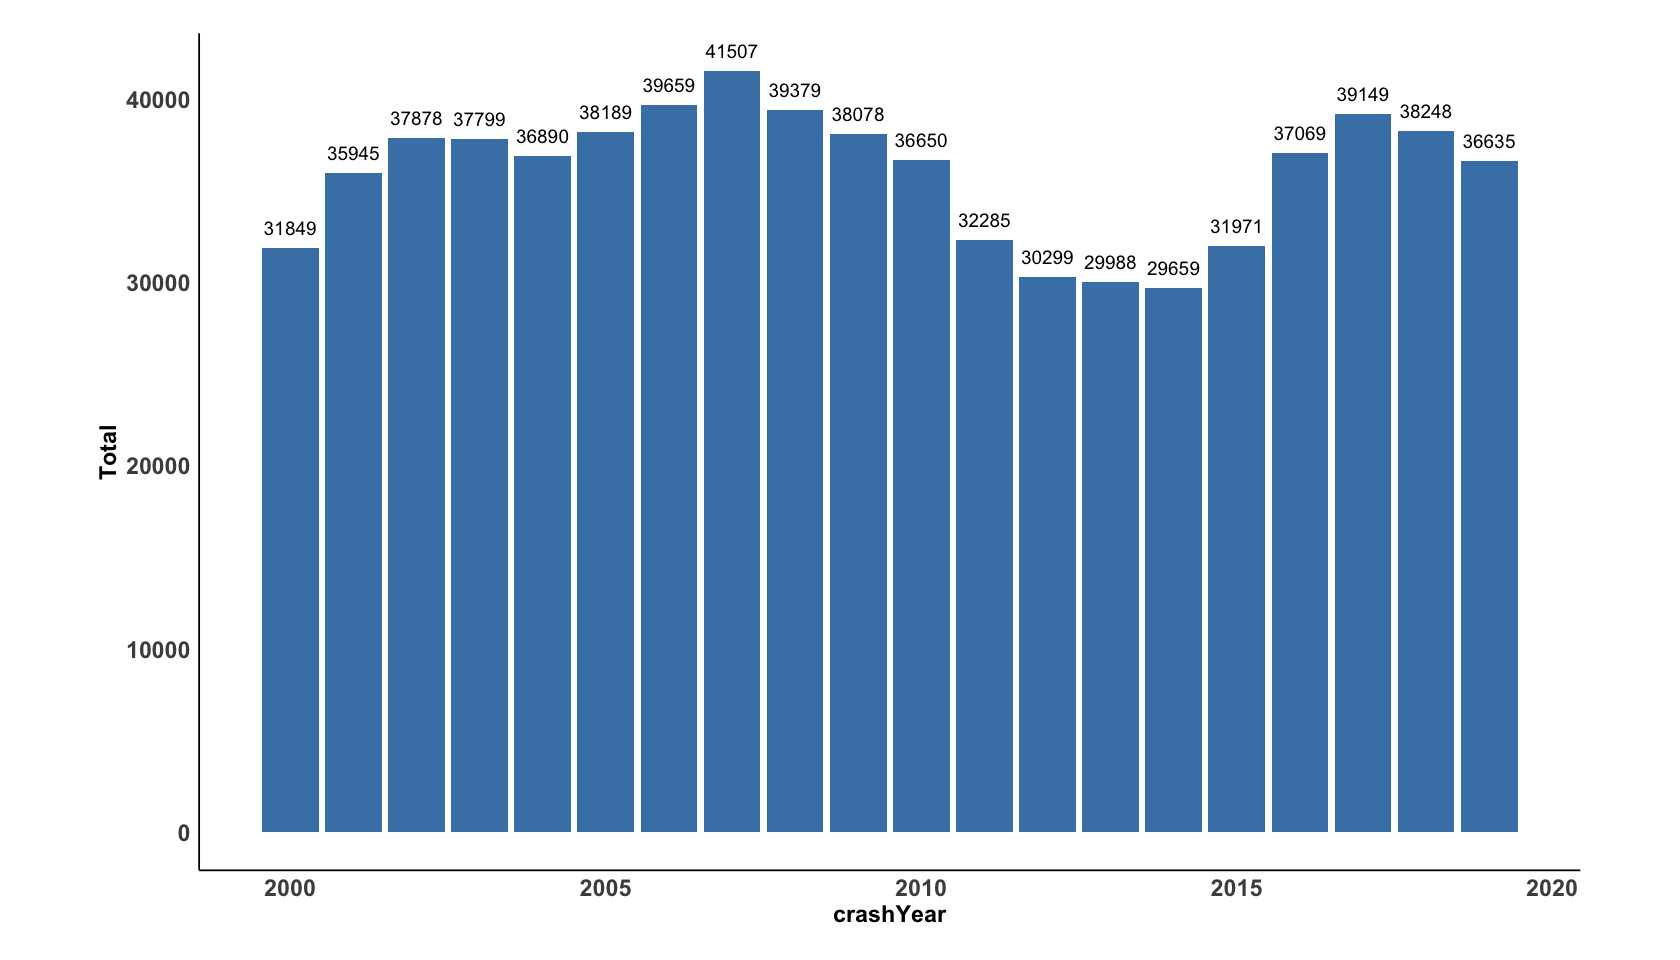

In [296]:
#set plot size
options(repr.plot.width = 14)
options(repr.plot.height = 8)

# plot bar
plot_data <- crash_trend
p_1 <- ggplot(plot_data, aes(x = crashYear)) +
  geom_bar(aes(y = total), stat = "identity", fill = "steelblue") +
  ylab("Total") +
  xlab("crashYear") +
  geom_text(aes(y = total, label = total), vjust = -1, size = 4, color = "black") +
  theme_minimal() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank()) +
  theme(axis.line = element_line(color = "black"),
        plot.margin = margin(l = 60, r = 60, b = 20, t = 20),
        plot.title = element_text(hjust = 0.5),
        axis.text = element_text(size = 14, face = "bold"),
        axis.title = element_text(size = 14, face = "bold"))

p_1

Warning message:
“Removed 1 row containing missing values (`geom_line()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_text()`).”


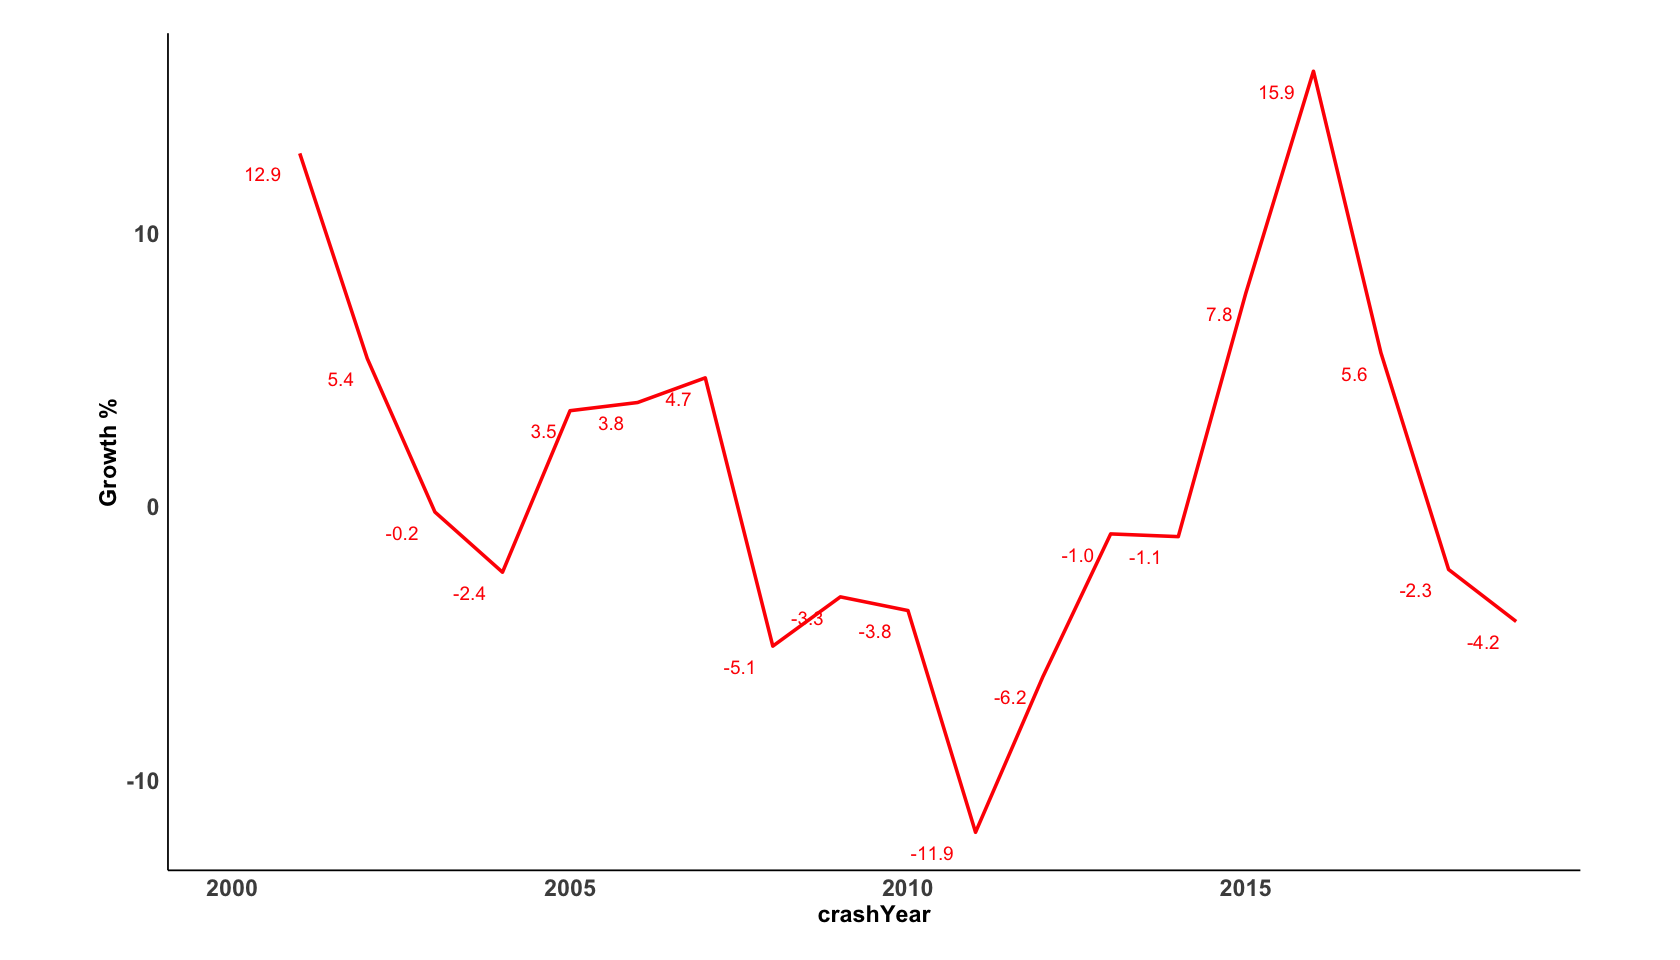

In [297]:
# plot growth
p_2 <- ggplot(plot_data, aes(x = crashYear)) +
  geom_line(aes(y = growth), color = "red", size = 1) +
  ylab("Growth %") +
  xlab("crashYear") +
  geom_text(aes(y = growth, label = sprintf("%.1f", growth), hjust = 1.5),
            vjust = 2, size = 4, color = "red") +
  theme_minimal() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank()) +
  theme(axis.line = element_line(color = "black"),
        plot.margin = margin(l = 60, r = 60, b = 20, t = 20),
        plot.title = element_text(hjust = 0.5),
        axis.text = element_text(size = 14, face = "bold"),
        axis.title = element_text(size = 14, face = "bold"))
 
p_2

### Analysing Road Categories And Casualties of Traffic Crashes In New Zealand (RITA)

In [262]:
location%>%glimpse()

Rows: 534,296
Columns: 7
$ location_id <chr> "-38.6697929142381_178.031839713406", "-37.7858623195004_1…
$ region      <chr> "Gisborne Region", "Waikato Region", "Auckland Region", "C…
$ urban       <chr> "Urban", "Urban", "Urban", "Open", "Urban", "Open", "Open"…
$ address     <chr> "SH 35 WAINUI", "HALL ST", "SHARON ROAD", "SPRINGSTON ROLL…
$ street      <chr> "HIRINI ST", "LAKE ROAD", "RIDGE ROAD", "DYNES ROAD", "ING…
$ Latitude    <dbl> -38.66979, -37.78586, -36.70833, -43.60950, -46.41783, -46…
$ Longitude   <dbl> 178.0318, 175.2647, 174.7517, 172.3944, 168.3853, 169.7398…


In [263]:
injury%>%glimpse()

Rows: 818,556
Columns: 5
$ crashid            <chr> "2011288941", "2012234057", "2012224021", "20117852…
$ fatalCount         <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ seriousInjuryCount <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ minorInjuryCount   <int> 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, …
$ crashSeverity      <chr> "Non-Injury Crash", "Non-Injury Crash", "Minor Cras…


In [264]:
crash_info%>%glimpse()

Rows: 817,280
Columns: 7
$ crashid            <chr> "2011288941", "2012234057", "2012224021", "20117852…
$ location_id        <chr> "-38.6697929142381_178.031839713406", "-37.78586231…
$ vehicleid          <chr> "v_1", "v_3", "v_5", "v_6", "v_8", "v_10", "v_11", …
$ des_id             <chr> "d_1", "d_2", "d_3", "d_4", "d_5", "d_6", "d_7", "d…
$ crashYear          <int> 2011, 2012, 2012, 2011, 2011, 2011, 2011, 2011, 201…
$ crashFinancialYear <chr> "2011/2012", "2011/2012", "2012/2013", "2011/2012",…
$ crashSHDescription <chr> "Yes", "No", "No", "No", "No", "No", "No", "No", "N…


In [280]:
description%>%glimpse()

Rows: 817,280
Columns: 14
$ des_id                    <chr> "d_1", "d_2", "d_3", "d_4", "d_5", "d_6", "d…
$ crashid                   <chr> "2011288941", "2012234057", "2012224021", "2…
$ crashDirectionDescription <chr> "Null", "Null", "Null", "Null", "Null", "Nul…
$ bus                       <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ carStationWagon           <int> 2, 2, 0, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2,…
$ roadCharacter             <chr> "Nil", "Nil", "Nil", "Nil", "Nil", "Nil", "N…
$ crashSeverity             <chr> "Non-Injury Crash", "Non-Injury Crash", "Min…
$ roadLane                  <chr> "2-way", "2-way", "2-way", "2-way", "2-way",…
$ NumberOfLanes             <int> 1, 5, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 1, 2, 4,…
$ roadSurface               <chr> "Sealed", "Sealed", "Sealed", "Sealed", "Sea…
$ speedLimit                <int> 50, 50, 50, 100, 50, 100, 80, 50, 80, 50, 50…
$ weatherA                  <chr> "Fine", "Fine", "Fine", "Fine", "Fine", "Fin…
$ weatherB    

In [282]:
crash_road%>%glimpse()

Rows: 818,556
Columns: 6
$ crashid            <chr> "2011288941", "2012234057", "2012224021", "20117852…
$ fatalCount         <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ seriousInjuryCount <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ minorInjuryCount   <int> 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, …
$ crashSeverity      <chr> "Non-Injury Crash", "Non-Injury Crash", "Minor Cras…
$ crashYear          <int> 2011, 2012, 2012, 2011, 2011, 2011, 2011, 2011, 201…


In [283]:
crash_road <- crash_road %>% left_join(description %>% select(crashid, roadCharacter) ,by = "crashid")

In [285]:
crash_road%>%glimpse()

Rows: 818,556
Columns: 7
$ crashid            <chr> "2011288941", "2012234057", "2012224021", "20117852…
$ fatalCount         <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ seriousInjuryCount <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ minorInjuryCount   <int> 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, …
$ crashSeverity      <chr> "Non-Injury Crash", "Non-Injury Crash", "Minor Cras…
$ crashYear          <int> 2011, 2012, 2012, 2011, 2011, 2011, 2011, 2011, 201…
$ roadCharacter      <chr> "Nil", "Nil", "Nil", "Nil", "Nil", "Nil", "Nil", "N…


In [287]:
savefile(crash_road,"crash_road")

# 从这里往下写你们自己的代码，不需要弄上面的代码，
# 先读取我发你们的csv
# 记得把csv文件和notebook放到同一个文件夹，
# 再开始分析
# 记住时间期限选择下2000-2019年
# 选择疫情前的数据，我在报告里会说，实际是因为20-23年三年的数据量不够多

In [ ]:
crash_road <- injury %>% left_join(crash_info %>% select(crashid, crashYear) ,by = "crashid")

In [18]:
library(ggplot2)
library(dplyr)

In [19]:
crash_road <- read.csv("crash_road.csv", header = TRUE)
crash_pop <- read.csv("crash_pop.csv", header = TRUE)
crash_map <- read.csv("crash_map.csv", header = TRUE)


In [20]:
crash_road_filtered <- crash_road %>% 
  filter(crashYear >= 2000 & crashYear <= 2019)

In [23]:
severity_distribution <- crash_road_filtered %>% 
  group_by(roadCharacter, crashSeverity) %>%
  summarise(count = n(), .groups = 'drop')


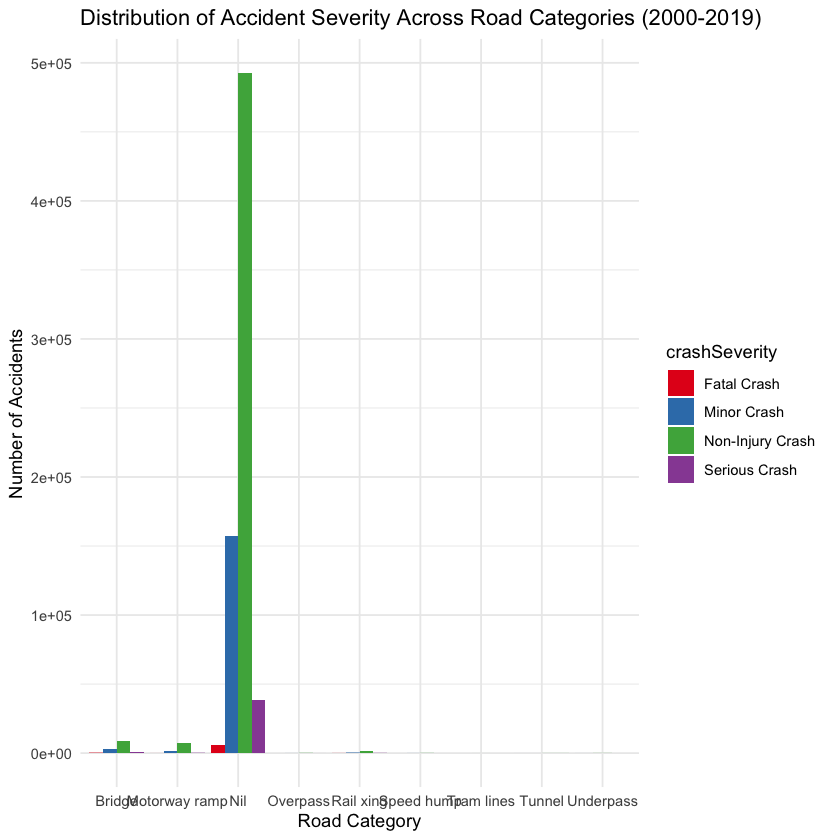

In [22]:
ggplot(severity_distribution, aes(x = roadCharacter, y = count, fill = crashSeverity)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = "Distribution of Accident Severity Across Road Categories (2000-2019)",
       x = "Road Category",
       y = "Number of Accidents") +
  theme_minimal() +
  scale_fill_brewer(palette = "Set1")


### Analysing New Zealand Traffic Accident Injuries and Deaths Map (PANLI)

In [2]:
crash_map <- injury %>% left_join(crash_info %>% select(crashid,location_id, crashYear) ,by = "crashid")

ERROR: Error in eval(expr, envir, enclos): object 'injury' not found


In [316]:
crash_map <- crash_map %>% left_join(location %>% select(location_id,Latitude, Longitude) ,by = "location_id")

In [317]:
crash_map%>%glimpse()

Rows: 818,556
Columns: 9
$ crashid            <chr> "2011288941", "2012234057", "2012224021", "20117852…
$ fatalCount         <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ seriousInjuryCount <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ minorInjuryCount   <int> 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, …
$ crashSeverity      <chr> "Non-Injury Crash", "Non-Injury Crash", "Minor Cras…
$ location_id        <chr> "-38.6697929142381_178.031839713406", "-37.78586231…
$ crashYear          <int> 2011, 2012, 2012, 2011, 2011, 2011, 2011, 2011, 201…
$ Latitude           <dbl> -38.66979, -37.78586, -36.70833, -43.60950, -46.417…
$ Longitude          <dbl> 178.0318, 175.2647, 174.7517, 172.3944, 168.3853, 1…


In [272]:
che_duplicate(crash_map,crashid)%>%head(2)

[1] "The total number of duplicates: 0 ."


crashid,n
<chr>,<int>
2000100001,1
2000100014,1


In [318]:
crash_map <- crash_map %>%
  filter(!is.na(location_id))

In [319]:
crash_map%>%glimpse()

Rows: 817,280
Columns: 9
$ crashid            <chr> "2011288941", "2012234057", "2012224021", "20117852…
$ fatalCount         <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ seriousInjuryCount <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ minorInjuryCount   <int> 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, …
$ crashSeverity      <chr> "Non-Injury Crash", "Non-Injury Crash", "Minor Cras…
$ location_id        <chr> "-38.6697929142381_178.031839713406", "-37.78586231…
$ crashYear          <int> 2011, 2012, 2012, 2011, 2011, 2011, 2011, 2011, 201…
$ Latitude           <dbl> -38.66979, -37.78586, -36.70833, -43.60950, -46.417…
$ Longitude          <dbl> 178.0318, 175.2647, 174.7517, 172.3944, 168.3853, 1…


In [320]:
savefile(crash_map,"crash_map")

In [3]:
library(ggplot2)
library(ggspatial)

In [25]:
install.packages("ggforce")
library(ggforce)


Installing package into 'C:/Users/Pony/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)

also installing the dependencies 'tweenr', 'polyclip'




package 'tweenr' successfully unpacked and MD5 sums checked
package 'polyclip' successfully unpacked and MD5 sums checked
package 'ggforce' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Pony\AppData\Local\Temp\RtmpeQqgGt\downloaded_packages


In [6]:
# 合稿的时候这个可以不要，我没跑你前面的代码，所以我重新读了一遍数据
setwd("E:/UC-MADS/DATA 422 DATA Wrangling/Group Project")

# 读取CSV文件
crash_map <- read.csv("crash_map.csv")
head(crash_map)

,crashid,fatalCount,seriousInjuryCount,minorInjuryCount,crashSeverity,location_id,crashYear,Latitude,Longitude
,<int>,<int>,<int>,<int>,<chr>,<chr>,<int>,<dbl>,<dbl>
1,2011288941,0,0,0,Non-Injury Crash,-38.6697929142381_178.031839713406,2011,-38.66979,178.0318
2,2012234057,0,0,0,Non-Injury Crash,-37.7858623195004_175.264694847103,2012,-37.78586,175.2647
3,2012224021,0,0,1,Minor Crash,-36.7083284326892_174.751714575468,2012,-36.70833,174.7517
4,2011785284,0,0,0,Non-Injury Crash,-43.6094954882884_172.394397590653,2011,-43.60950,172.3944
5,2011326317,0,0,0,Non-Injury Crash,-46.4178256165284_168.38529948405,2011,-46.41783,168.3853
6,2011465208,0,0,0,Non-Injury Crash,-46.2625167312259_169.739754213041,2011,-46.26252,169.7398


In [54]:
cas2000to2004 <- crash_map[(crash_map$crashYear >= 2000 & crash_map$crashYear <= 2004) & crash_map$crashSeverity != "Non-Injury Crash", ]
cas2005to2009 <- crash_map[(crash_map$crashYear >= 2005 & crash_map$crashYear <= 2009) & crash_map$crashSeverity != "Non-Injury Crash", ]
cas2010to2014 <- crash_map[(crash_map$crashYear >= 2010 & crash_map$crashYear <= 2014) & crash_map$crashSeverity != "Non-Injury Crash", ]
cas2015to2019 <- crash_map[(crash_map$crashYear >= 2015 & crash_map$crashYear <= 2019) & crash_map$crashSeverity != "Non-Injury Crash", ]
cas2020to2023 <- crash_map[(crash_map$crashYear >= 2020 & crash_map$crashYear <= 2023) & crash_map$crashSeverity != "Non-Injury Crash", ]


In [55]:
# 保存数据框为CSV文件
write.csv(cas2000to2004, "cas2000to2004.csv", row.names = FALSE)
write.csv(cas2005to2009, "cas2005to2009.csv", row.names = FALSE)
write.csv(cas2010to2014, "cas2010to2014.csv", row.names = FALSE)
write.csv(cas2015to2019, "cas2015to2019.csv", row.names = FALSE)
write.csv(cas2020to2023, "cas2020to2023.csv", row.names = FALSE)

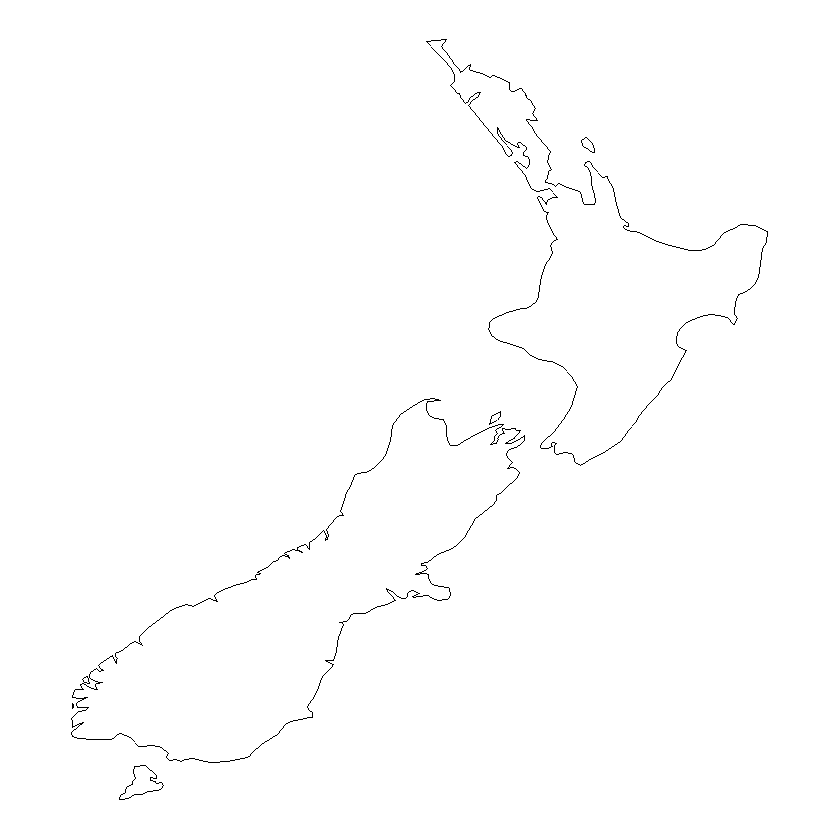

In [11]:
# Use the latitude and longitude range for New Zealand
nz_map <- map_data("world", region = "New Zealand")

# Set the latitude and longitude range for New Zealand
nz_lat_range <- c(-47.3, -34.4)
nz_long_range <- c(166.7, 178.5)

# Filter the data to limit the display to the specified range
filtered_map <- subset(nz_map, lat >= nz_lat_range[1] & lat <= nz_lat_range[2] &
                         long >= nz_long_range[1] & long <= nz_long_range[2])

# Create a map of New Zealand
ggplot() +
  geom_polygon(data = filtered_map, aes(x = long, y = lat, group = group), fill = "white", color = "black") +
  theme_void() +
  coord_fixed(ratio = 1, xlim = nz_long_range, ylim = nz_lat_range)



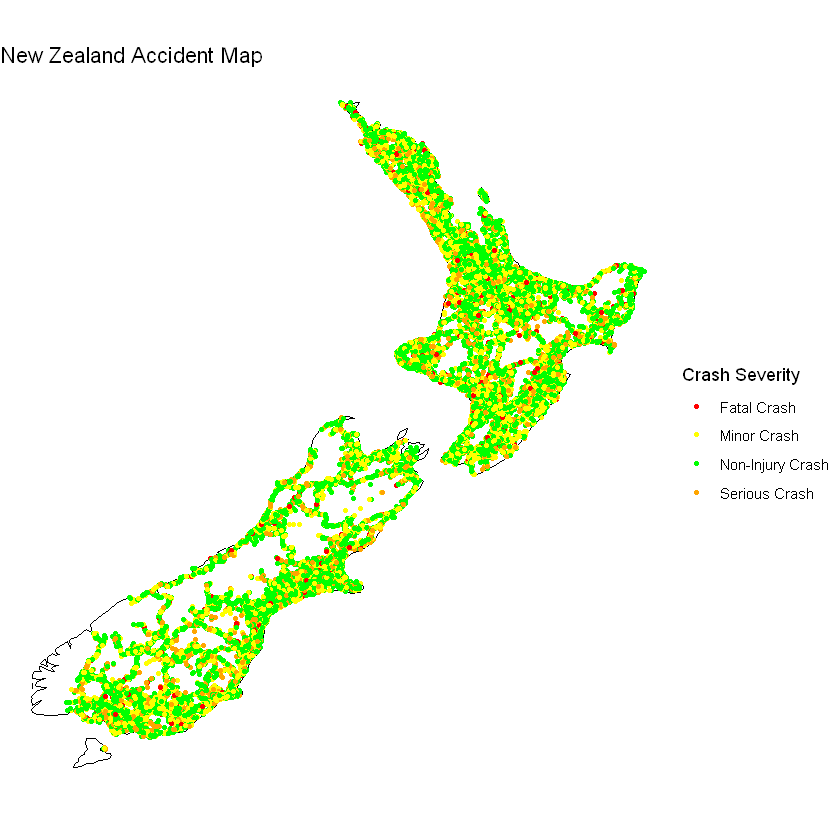

In [64]:

library(ggplot2)

ggplot() +
  geom_polygon(data = filtered_map, aes(x = long, y = lat, group = group), fill = "white", color = "black") +
  theme_void() +
  coord_fixed(ratio = 1, xlim = nz_long_range, ylim = nz_lat_range) +
  geom_point(data = crash_map, aes(x = Longitude, y = Latitude, color = crashSeverity), size = 1) +
  scale_color_manual(values = c("Fatal Crash" = "red", "Serious Crash" = "orange", "Minor Crash" = "yellow", "Non-Injury Crash" = "green"),
                     guide = guide_legend(title = "Crash Severity")) +
  labs(title = "New Zealand Accident Map")



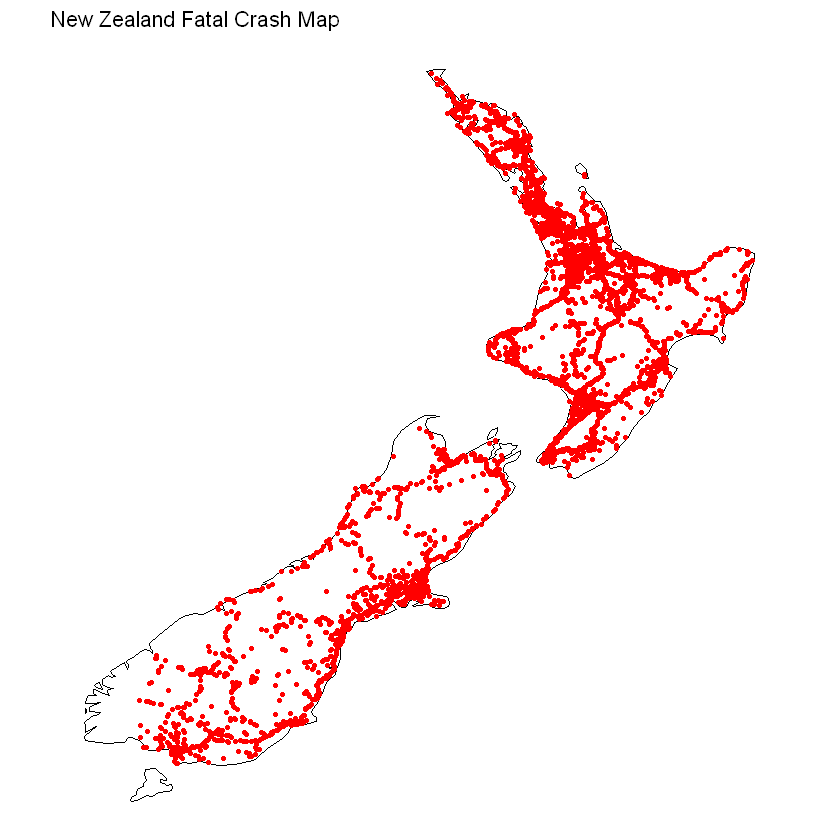

In [60]:
ggplot() +
  geom_polygon(data = filtered_map, aes(x = long, y = lat, group = group), fill = "white", color = "black") +
  theme_void() +
  coord_fixed(ratio = 1, xlim = nz_long_range, ylim = nz_lat_range) +
  geom_point(data = subset(crash_map, crashSeverity == "Fatal Crash"), aes(x = Longitude, y = Latitude), color = "red", size = 1) +
  labs(title = "New Zealand Fatal Crash Map")

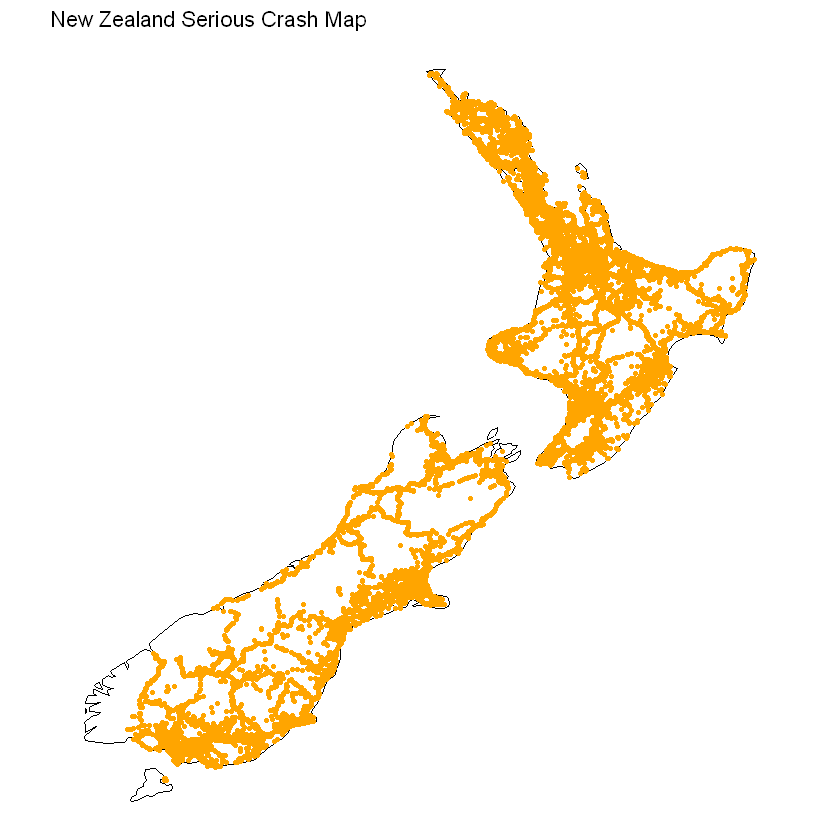

In [59]:
ggplot() +
  geom_polygon(data = filtered_map, aes(x = long, y = lat, group = group), fill = "white", color = "black") +
  theme_void() +
  coord_fixed(ratio = 1, xlim = nz_long_range, ylim = nz_lat_range) +
  geom_point(data = subset(crash_map, crashSeverity == "Serious Crash"), aes(x = Longitude, y = Latitude), color = "orange", size = 2) +
  labs(title = "New Zealand Serious Crash Map")

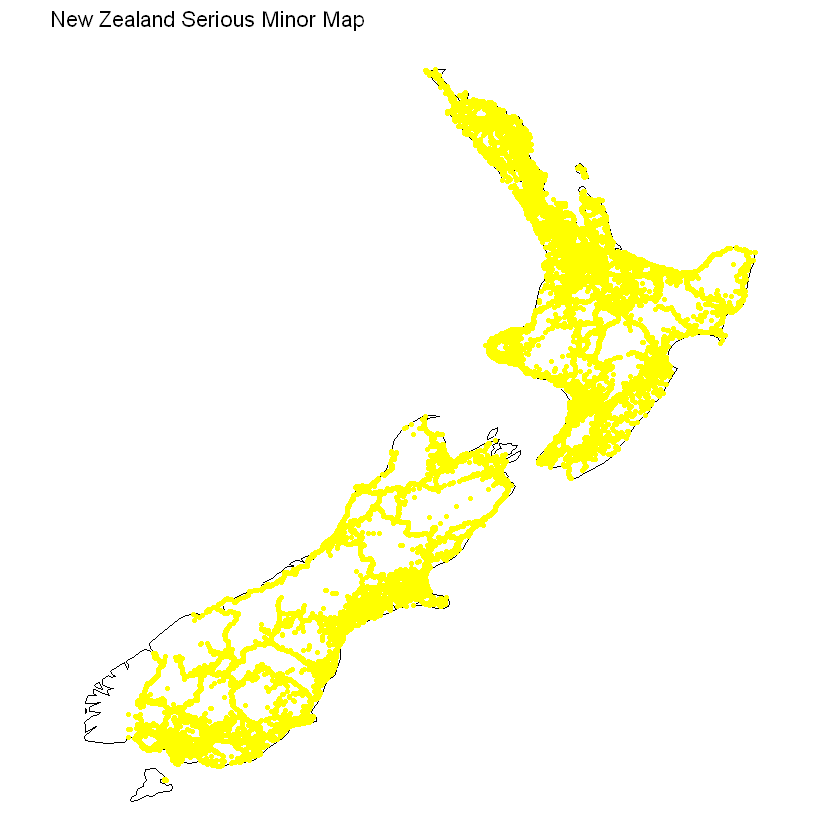

In [62]:
ggplot() +
  geom_polygon(data = filtered_map, aes(x = long, y = lat, group = group), fill = "white", color = "black") +
  theme_void() +
  coord_fixed(ratio = 1, xlim = nz_long_range, ylim = nz_lat_range) +
  geom_point(data = subset(crash_map, crashSeverity == "Minor Crash"), aes(x = Longitude, y = Latitude), color = "yellow", size = 1) +
  labs(title = "New Zealand Serious Minor Map")

### Correlation between the number of car crashes and region population (NINA)

In [298]:
pop_nz%>%glimpse()

Rows: 391
Columns: 3
$ region <chr> "Auckland Region", "Bay of Plenty Region", "Canterbury Region",…
$ value  <int> 1074507, 246900, 496700, NA, 147300, 227500, NA, NA, 3880500, 1…
$ pop_id <chr> "2001_Auckland Region", "2001_Bay of Plenty Region", "2001_Cant…


In [299]:
injury%>%glimpse()

Rows: 818,556
Columns: 5
$ crashid            <chr> "2011288941", "2012234057", "2012224021", "20117852…
$ fatalCount         <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ seriousInjuryCount <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ minorInjuryCount   <int> 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, …
$ crashSeverity      <chr> "Non-Injury Crash", "Non-Injury Crash", "Minor Cras…


In [304]:
crash_info %>% glimpse()

Rows: 817,280
Columns: 8
$ crashid            <chr> "2011288941", "2012234057", "2012224021", "20117852…
$ location_id        <chr> "-38.6697929142381_178.031839713406", "-37.78586231…
$ vehicleid          <chr> "v_1", "v_3", "v_5", "v_6", "v_8", "v_10", "v_11", …
$ des_id             <chr> "d_1", "d_2", "d_3", "d_4", "d_5", "d_6", "d_7", "d…
$ pop_id             <chr> "2011_Gisborne Region", "2012_Waikato Region", "201…
$ crashYear          <int> 2011, 2012, 2012, 2011, 2011, 2011, 2011, 2011, 201…
$ crashFinancialYear <chr> "2011/2012", "2011/2012", "2012/2013", "2011/2012",…
$ crashSHDescription <chr> "Yes", "No", "No", "No", "No", "No", "No", "No", "N…


In [305]:
crash_pop <- injury %>% left_join(crash_info %>% select(crashid,pop_id, crashYear) ,by = "crashid")

In [306]:
crash_pop <- crash_pop %>% left_join(pop_nz %>% select(pop_id,value) ,by = "pop_id")

In [307]:
crash_pop%>%glimpse()

Rows: 818,556
Columns: 8
$ crashid            <chr> "2011288941", "2012234057", "2012224021", "20117852…
$ fatalCount         <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ seriousInjuryCount <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ minorInjuryCount   <int> 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, …
$ crashSeverity      <chr> "Non-Injury Crash", "Non-Injury Crash", "Minor Cras…
$ pop_id             <chr> "2011_Gisborne Region", "2012_Waikato Region", "201…
$ crashYear          <int> 2011, 2012, 2012, 2011, 2011, 2011, 2011, 2011, 201…
$ value              <int> NA, NA, 1507600, 559300, 95700, 206600, NA, 1486000…


In [311]:
crash_pop %>%
  filter(!is.na(pop_id)) %>%
  nrow()

[1] 817280

In [312]:
savefile(crash_pop,"crash_pop")